<h1>Capstone Project - The Battle of Neighborhoods</h1>

<h2>Business Problem</h2>

<h3>Description</h3>

We are a consulting company that supports new restaurants in the state of New York. One of our clients has come to us for advice because they would like to open a new mexican restaurant in New York next spring 2021. They are looking for the best location to open "Fastastaco" a mexican restaurant focused to offer the authentic taste of Mexico in a simple format. They have three main dishes: tacos, burritos and quesadillas and you can choose different fillings. Ideal to order to go or to have a nice lunch. The price range is based somewhere in the middle, nothing too fancy but neither too cheap. 

Our client is looking to rent a place in a well located neighborhood and in a street with good affluence of people, but taking into consideration an affordable rent price, competition and income of the neighborhood.

Our goal as consulting company is to provide our client a few options to choose the location for his new restaurant based on our research and taking into consideration the conditions of our client.

<h2>Data sources</h2>


We will use diverse data sources to solve this problem

Foursquare API: Identify the number mexican restaurants in New York, try to find count of mexican restaurants per neighborhood, identify competition. We would also try to identify the location of the best rated restaurants.

Pedestrian count: In order to give us an idea of the pedestrian volume of certain streets, we will take the data for NYC on pedestrian count for the last 5 years during May in the main comercial corridors. https://www1.nyc.gov/html/dot/html/about/datafeeds.shtml#Pedestrians

Average Retail rent per neighborhood: We will take into consideration neighborhoods based on a middle standard price. https://comptroller.nyc.gov/reports/retail-vacancy-in-new-york-city/#_ABSTRACT_RENDERER_ID_13

https://comptroller.nyc.gov/wp-content/uploads/documents/Retail_Neighborhood_Profiles_2017.pdf




<h2>Methodology and Data Analysis</h2>


We will pull the data sets to convert them in data frames in order to start with analysis

    1. Analysis average retail rent per neighborhood
    2. Analysis of Pedestrian Count
    3. Analysis Competition
    4. Results and conclusions
    

In [52]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import urllib.request

import json # library to handle JSON files

!pip install geopy # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
!pip install geopandas


import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!pip install folium # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


print('Libraries imported.')

Libraries imported.


<h3>1. Analysis average retail rent per neighborhood</h3>

Source=https://comptroller.nyc.gov/reports/retail-vacancy-in-new-york-city/#_ABSTRACT_RENDERER_ID_13
Chart 6

Unfortunately I was not able to pull the data directly from the webpage, therefore I tried to look for the table within the html code. Using BeautifulSoup or any other method was not possible either. The table is pulled from a google doc(https://docs.google.com/spreadsheets/d/1P2BST1cldlGn-XxvehRTsbmqa2CvoLXdd_-gU0-2k2w/gviz/tq?sheet=AverageRetailRents&headers=1&tq=select%20*%20&tqx=reqId%3A29), however the document is protected and therefore cannot be pulled directly from there. I decided to save the data in an excel file and save it directly in a local folder.



In [69]:
df = pd.read_excel (r'Table Average Retail rent.xlsx')

In [70]:
df2=df.set_index('Year')
df2

,5th/Madison/UE,UWS,Midtown E.,Downtown W.,Midtown West,Downtown E.,FIDI/BPC,Uptown,Harlem,Queens,Gentrified BK,Bronx,Outer BK,Staten Island
Year,,,,,,,,,,,,,,
2007,77.07,75.61,80.86,55.76,63.63,43.53,58.64,43.68,28.27,29.85,24.67,23.82,22.05,18.86
2008,95.21,78.60,74.86,56.35,57.92,47.83,60.04,37.63,29.62,31.08,26.95,25.30,20.68,22.04
2009,93.92,85.98,77.65,79.24,60.66,51.38,61.48,37.51,33.40,30.39,26.50,26.81,25.12,21.16
2010,100.02,87.99,80.44,72.67,60.45,54.86,62.92,40.89,31.45,31.14,28.71,27.57,25.21,20.63
2011,99.61,93.52,91.89,80.61,64.07,63.32,60.91,42.54,44.00,32.80,37.16,28.59,26.17,22.49
2012,111.51,99.05,86.28,79.41,67.68,62.83,61.98,43.94,36.08,31.59,32.96,27.70,25.08,22.07
2013,112.87,101.17,97.26,94.23,73.10,68.69,62.16,46.84,37.60,33.08,32.77,28.17,25.89,22.54
2014,110.59,95.17,96.09,95.39,81.86,59.64,59.52,44.27,33.65,26.24,27.29,25.90,20.19,18.20
2015,116.98,105.72,96.37,80.89,84.49,63.21,56.88,45.38,34.18,26.37,27.63,27.34,21.92,19.83


<function matplotlib.pyplot.show(*args, **kw)>

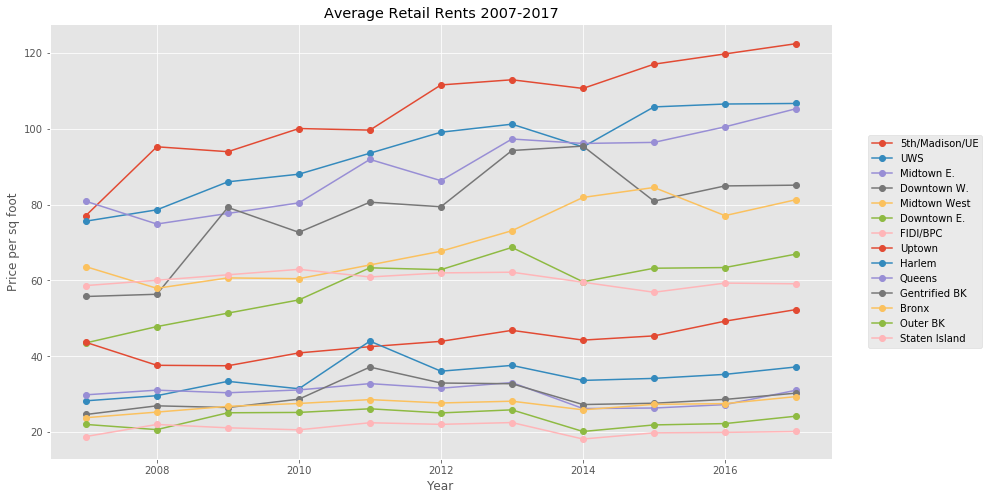

In [140]:
df2.index=df2.index.map(int)
df2.plot(kind='line' ,figsize=(14,8), x_compat=True, marker="o")
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.title("Average Retail Rents 2007-2017")
plt.ylabel("Price per sq foot")
plt.xlabel("Year")
plt.show

The neighborhood division as follows

<img src="https://comptroller.nyc.gov/wp-content/uploads/2019/09/retail_charta1.jpg" alt="" srcset="https://comptroller.nyc.gov/wp-content/uploads/2019/09/retail_charta1.jpg 915w, https://comptroller.nyc.gov/wp-content/uploads/2019/09/retail_charta1-300x247.jpg 300w, https://comptroller.nyc.gov/wp-content/uploads/2019/09/retail_charta1-768x632.jpg 768w, https://comptroller.nyc.gov/wp-content/uploads/2019/09/retail_charta1-800x658.jpg 800w, https://comptroller.nyc.gov/wp-content/uploads/2019/09/retail_charta1-120x99.jpg 120w" sizes="(max-width: 915px) 100vw, 915px">

In [99]:
df_def = pd.read_excel (r'NYC definition.xlsx')
df_def.head()

,Neighborhood,ZIP Code,Latitude,Longitude
0,Uptown,10034,NaN,NaN
1,Uptown,10040,NaN,NaN
2,Uptown,10033,NaN,NaN
3,Uptown,10031,NaN,NaN
4,Uptown,10039,NaN,NaN


In [100]:
df_def=df_def.drop(["Latitude","Longitude"],axis=1)
df_def.head()

,Neighborhood,ZIP Code
0,Uptown,10034
1,Uptown,10040
2,Uptown,10033
3,Uptown,10031
4,Uptown,10039


In [101]:
import requests, zipfile, io
r = requests.get('http://download.geonames.org/export/zip/US.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()


In [102]:
zip_us= pd.read_csv('US.txt',delimiter="\t",header=None)


In [103]:
zip_us=zip_us.rename(columns={0:"Country",1:"ZIP Code", 2:"Neighborhood2", 3:"State", 5:"County", 9:"Latitude", 10:"Longitude"})
zip_us.head()

,Country,ZIP Code,Neighborhood2,State,4,County,6,7,8,Latitude,Longitude,11
0,US,99553,Akutan,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.1430,-165.7854,1.0
1,US,99571,Cold Bay,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.1858,-162.7211,1.0
2,US,99583,False Pass,Alaska,AK,Aleutians East,13.0,NaN,NaN,54.8542,-163.4113,1.0
3,US,99612,King Cove,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.0628,-162.3056,1.0
4,US,99661,Sand Point,Alaska,AK,Aleutians East,13.0,NaN,NaN,55.3192,-160.4914,1.0


In [104]:
zip_us1=zip_us[["Country","ZIP Code","Neighborhood2","State","County", "Latitude", "Longitude"]]
zip_us1.head()

,Country,ZIP Code,Neighborhood2,State,County,Latitude,Longitude
0,US,99553,Akutan,Alaska,Aleutians East,54.1430,-165.7854
1,US,99571,Cold Bay,Alaska,Aleutians East,55.1858,-162.7211
2,US,99583,False Pass,Alaska,Aleutians East,54.8542,-163.4113
3,US,99612,King Cove,Alaska,Aleutians East,55.0628,-162.3056
4,US,99661,Sand Point,Alaska,Aleutians East,55.3192,-160.4914


In [105]:
df_def1=df_def.merge(zip_us1, how='left')


In [106]:
df_def1.head()

,Neighborhood,ZIP Code,Country,Neighborhood2,State,County,Latitude,Longitude
0,Uptown,10034,US,New York,New York,New York,40.8662,-73.9221
1,Uptown,10040,US,New York,New York,New York,40.8583,-73.9296
2,Uptown,10033,US,New York,New York,New York,40.8496,-73.9356
3,Uptown,10031,US,New York,New York,New York,40.8246,-73.9507
4,Uptown,10039,US,New York,New York,New York,40.8265,-73.9383


In [107]:
df_def1=df_def1.dropna()

In [108]:
rent2017=df2.reset_index()
rent2017=rent2017.iloc[10,0:15]



In [109]:
df_rent2017=pd.DataFrame(rent2017)
df_rent2017

,10
Year,2017.00
5th/Madison/UE,122.38
UWS,106.63
Midtown E.,105.24
Downtown W.,85.10
Midtown West,81.27
Downtown E.,66.93
FIDI/BPC,59.11
Uptown,52.31
Harlem,37.19


In [110]:
df_rent2017=df_rent2017.drop(df_rent2017.index[0])


In [111]:
df_rent2017=df_rent2017.rename(columns={10:"Rent2017"})

In [112]:
df_rent2017=df_rent2017.rename(index={"5th/Madison/UE":"5th Ave/ Madison Ave/ Upper East Side","UWS":"Upper West Side","Midtown E.":"Midtown East","Downtown W.":"Down Town West","Downtown E.":"Down Town East","FIDI/BPC":"Financial District/Battery Park City","Gentrified BK":"Gentrified Brooklyn","Outer BK":"Outer Brooklyn"})


In [113]:
df_rent2017=df_rent2017.reset_index()


In [114]:
df_rent2017=df_rent2017.rename(columns={"index":"Neighborhood"})
df_rent2017

,Neighborhood,Rent2017
0,5th Ave/ Madison Ave/ Upper East Side,122.38
1,Upper West Side,106.63
2,Midtown East,105.24
3,Down Town West,85.10
4,Midtown West,81.27
5,Down Town East,66.93
6,Financial District/Battery Park City,59.11
7,Uptown,52.31
8,Harlem,37.19
9,Queens,31.06


In [115]:
df_def2=df_def1.merge(df_rent2017)
df_def2.head()

,Neighborhood,ZIP Code,Country,Neighborhood2,State,County,Latitude,Longitude,Rent2017
0,Uptown,10034,US,New York,New York,New York,40.8662,-73.9221,52.31
1,Uptown,10040,US,New York,New York,New York,40.8583,-73.9296,52.31
2,Uptown,10033,US,New York,New York,New York,40.8496,-73.9356,52.31
3,Uptown,10031,US,New York,New York,New York,40.8246,-73.9507,52.31
4,Uptown,10039,US,New York,New York,New York,40.8265,-73.9383,52.31


In [168]:
import folium
import pandas as pd
import folium.plugins

import branca
import branca.colormap as cm




colormap = cm.LinearColormap(colors=['lightblue', 'blue'], index=[0,130],vmin=0,vmax=130)

map = folium.Map(location=[40.730610, -73.935242], zoom_start=11, tiles='cartodbpositron')


lat = list(df_def2.Latitude)
lon = list(df_def2.Longitude)
rent = list(df_def2.Rent2017)
labels = list(df_def2.Neighborhood)

for loc, p in zip(zip(lat, lon), rent):
    folium.Circle(
        location=loc,
        radius=10,
        fill=True,
        color=colormap(p),
        fill_opacity=0.7
    ).add_to(map)

map.add_child(colormap)

display(map)

<h3>2. Analysis of Pedestrian Count</h3>

In [181]:
df_count = pd.read_excel (r'nyc_pedestriancountmay2017.xlsx')
df_count.head()

,Borough,Area,From,Address,CountPM
0,Bronx,Broadway,West 231st Street,"West 231st Street, Bronx, NY",5893
1,Bronx,East 161st Street,Grand Concourse,"Grand Concourse, Bronx, NY",4920
2,Bronx,East Fordham Road,Valentine Avenue,"Valentine Avenue, Bronx, NY",12125
3,Bronx,East Gun Hill Road,Bainbridge Avenue,"Bainbridge Avenue, Bronx, NY",3130
4,Bronx,East Tremont Avenue,Prospect Avenue,"Prospect Avenue, Bronx, NY",3700


In [ ]:
locator = Nominatim(user_agent="myGeocoder")
from geopy.extra.rate_limiter import RateLimiter

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2- - create location column
df_count['location'] = df_count['Address'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df_count['point'] = df_count['location'].apply(lambda loc: tuple(loc.point) if loc else None)



In [183]:
df_count[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df_count['point'].tolist(), index=df_count.index)

In [ ]:
df_count=df_count.drop(['point','altitude'], axis=1)

In [186]:
df_count=df_count.dropna()

In [206]:
df_count['norm_countPM'] = (df_count['CountPM'] - df_count['CountPM'].min()) / (df_count['CountPM'].max() - df_count['CountPM'].min())

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [207]:
df_count.head()

,Borough,Area,From,Address,CountPM,location,latitude,longitude,norm_countPM
0,Bronx,Broadway,West 231st Street,"West 231st Street, Bronx, NY",5893,"(West 231st Street, Kingsbridge Heights, The B...",40.875677,-73.900680,0.222326
1,Bronx,East 161st Street,Grand Concourse,"Grand Concourse, Bronx, NY",4920,"(Grand Concourse, Fordham, The Bronx, Bronx Co...",40.865373,-73.894907,0.184361
2,Bronx,East Fordham Road,Valentine Avenue,"Valentine Avenue, Bronx, NY",12125,"(Valentine Avenue, Tremont, The Bronx, Bronx C...",40.850253,-73.900694,0.465488
3,Bronx,East Gun Hill Road,Bainbridge Avenue,"Bainbridge Avenue, Bronx, NY",3130,"(Bainbridge Avenue, Bedford Park, The Bronx, B...",40.871382,-73.883781,0.114519
4,Bronx,East Tremont Avenue,Prospect Avenue,"Prospect Avenue, Bronx, NY",3700,"(Prospect Avenue, Westchester Avenue, Saint Ma...",40.819651,-73.901657,0.136759


In [374]:
nyc_countmap = folium.Map(location=[40.730610, -73.935242], zoom_start=11, tiles='cartodbpositron')

 
# I can add marker one by one on the map
for i in range(0,len(df_count)):
    folium.Circle(
        location=[df_count.iloc[i]['latitude'], df_count.iloc[i]['longitude']],
        popup=df_count.iloc[i]['Address']+ " "+ "Count:"+df_count.iloc[i]['CountPM'].astype(str),
        radius=df_count.iloc[i]['norm_countPM']*700,
        color="lightblue",
        fill=True,
        fill_color="lightblue"
 ).add_to(nyc_countmap)


# show map
nyc_countmap


<h3>3. Analysis Competition</h3>

In [354]:
CLIENT_ID = 'BKQKIQQFIFDDIKLDH3YOFZ542VXQ4CYJHVIF3RJ50YXVIJK5' # your Foursquare ID
CLIENT_SECRET = 'RA4RR55QARYSDH25Q2BUNC4PZITJRX21YITO1MWUQNFOV1AM' # your Foursquare Secret
VERSION = '20200301' # Foursquare API version
RADIUS=24000
LIMIT=200
categoryId="4bf58dd8d48988d1c1941735"

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BKQKIQQFIFDDIKLDH3YOFZ542VXQ4CYJHVIF3RJ50YXVIJK5
CLIENT_SECRET:RA4RR55QARYSDH25Q2BUNC4PZITJRX21YITO1MWUQNFOV1AM


In [355]:
city = 'New York, NY'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(city)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.7127281 -74.0060152


In [356]:
url = 'https://api.foursquare.com/v2/venues/explore?&categoryId=4bf58dd8d48988d1c1941735&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    RADIUS, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&categoryId=4bf58dd8d48988d1c1941735&client_id=BKQKIQQFIFDDIKLDH3YOFZ542VXQ4CYJHVIF3RJ50YXVIJK5&client_secret=RA4RR55QARYSDH25Q2BUNC4PZITJRX21YITO1MWUQNFOV1AM&v=20200301&ll=40.7127281,-74.0060152&radius=24000&limit=200'

In [357]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e9da7d671c428001bcc1d78'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'New York',
  'headerFullLocation': 'New York',
  'headerLocationGranularity': 'city',
  'query': 'mexican',
  'totalResults': 334,
  'suggestedBounds': {'ne': {'lat': 40.92872831600022,
    'lng': -73.72158259044139},
   'sw': {'lat': 40.49672788399978, 'lng': -74.2904478095586}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '431e2d80f964a52079271fe3',
       'name': 'La Esquina',
       'location': {'address': '114 Kenmare St',
        'crossStreet': 'at Lafayette St',
        'lat': 40.72159769818963,
        'lng': -73.9974713

In [358]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [371]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.id','venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning:

pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead



,id,name,categories,lat,lng
0,431e2d80f964a52079271fe3,La Esquina,Mexican Restaurant,40.721598,-73.997471
1,3fd66200f964a52022e41ee3,Barrio Chino,Mexican Restaurant,40.718069,-73.989975
2,4c38ced2ae2da593576301c6,Tacombi at Fonda Nolita,Mexican Restaurant,40.724017,-73.993732
3,4f69f2b76d86f87117bb13ab,Gran Eléctrica,Mexican Restaurant,40.702570,-73.993096
4,54da9741498e0fc0fc4c5dd0,La Contenta,Mexican Restaurant,40.718757,-73.987032


In [372]:
nearby_venues.shape

(100, 5)

In [373]:
mexrest_map= folium.Map(location=[40.730610, -73.935242], zoom_start=12, tiles='cartodbpositron')


lat = list(nearby_venues.lat)
lon = list(nearby_venues.lng)


for loc in zip (lat, lon):
    folium.Circle(
        location=loc,
        radius=13,
        fill=True,
        color='blue'
    ).add_to(mexrest_map)


display(mexrest_map)

<h3>4. Results and conclusions</h3>

After a carefully observation of the results, the following conclusions can be drawn

->The Average retail rent is clearly cheaper outside Manhattan, therefore, we would advise to look into neighborhoods outside the island of Manhattan

->Although the main concentration of pedestrian count can be found in Manhattan and close surroundings, it is possible to identify 'bubbles' of interesting side in Brooklyn and Bronx

->Regarding competition, we could observe a strong saturation of mexican restaurants within the island of Manhattan. However, we need to take into consideration that we were limited to 100 venues calls in Foursquare. Nevertheless, we still might see a potential area within Brooklyn, close to Brooklyn bridge, where the saturation of mexican restaurants is not so drastic.